# Functionality of the Code
In this code, there is addition of Batch Normalization and Introduction of Variations in the number of Parameters.
So the three changes from the vanilla code are:
1. Addition of Batch Normalization
2. Changes in the number of channels 
3. Changes in the batch size

# Importing the required libraries and required modules

This is the vanilla coda that is executed without any additional layers other than Convolution

In [0]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add, BatchNormalization, Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

import cv2

import numpy as np
import matplotlib.pyplot as plt

### Loading the MNIST Dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

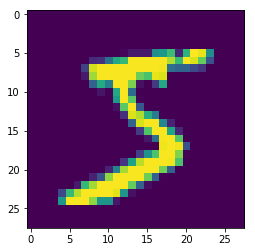

In [0]:
plt.imshow(x_train[0])

In [0]:
xtrain = x_train.reshape(x_train.shape[0], 28, 28,1)
xtest = x_test.reshape(x_test.shape[0], 28, 28,1)

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [0]:
xtrain /= 255.0
xtest /= 255.0

In [0]:
ytrain = np_utils.to_categorical(y_train, 10)
ytest = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(16, 3, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1, 1))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.p

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        272       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(xtrain, ytrain, batch_size=128, nb_epoch=10, verbose=1, validation_data=(xtest, ytest))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 261us/step - loss: 0.5463 - acc: 0.9244 - val_loss: 0.2559 - val_acc: 0.9796
Epoch 2/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.1873 - acc: 0.9820 - val_loss: 0.1317 - val_acc: 0.9860
Epoch 3/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.1115 - acc: 0.9877 - val_loss: 0.0811 - val_acc: 0.9897
Epoch 4/30
60000/60000 [==============================] - 11s 187us/step - loss: 0.0780 - acc: 0.9901 - val_loss: 0.0711 - val_acc: 0.9885
Epoch 5/30
60000/60000 [==============================] - 11s 176us/step - loss: 0.0587 - acc: 0.9918 - val_loss: 0.0501 - val_acc: 0.9919
Epoch 6/30
60000/60000 [==============================] - 11s 177us/step - loss: 0.0478 - acc: 0.9927 - val_loss: 0.0450 - val_acc: 0.9917
Epoch 7/30
60000/60000 [==============================] - 11s 175us/step - loss: 0.0381 - acc: 0.9940 - val_loss: 0.

In [0]:
score = model.evaluate(xtest, ytest, verbose=0)

In [0]:
print(score)

[0.06476370081705972, 0.9818]
